# Day 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 붓꽃 데이터
다중 유형 분류

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)  
#유형 도수
pd.Series(iris.target).value_counts()

(150, 4)


0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=20, eta0=0.1, shuffle=False)
model.fit(iris.data, iris.target)
accuracy = model.score(iris.data, iris.target)
print(f'정확도: {accuracy:.4f}')

model = Perceptron(max_iter=20, eta0=0.1, shuffle=True, random_state=3)
model.fit(iris.data, iris.target)
accuracy = model.score(iris.data, iris.target)
print(f'정확도: {accuracy:.4f}')

pd.DataFrame(model.coef_, columns=iris.feature_names, index=iris.target_names).assign(절편=model.intercept_).round(2)


정확도: 0.6667
정확도: 0.9667


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),절편
setosa,0.19,0.53,-0.88,-0.43,0.1
versicolor,1.44,-2.81,0.62,-2.44,1.1
virginica,-3.10,-2.99,5.02,4.42,-1.9


In [28]:
# 계속

# 직접 출력해보기
W = model.coef_
b = model.intercept_
outputs = iris.data @ W.T + b
예측 = np.argmax(outputs, axis=1)
assert np.all(예측 == model.predict(iris.data))
print(f'정확도: {(예측 == iris.target).mean():.4f}')
pd.DataFrame(outputs, columns=iris.target_names).assign(예측=예측, 정답=iris.target).sample(10).round(2)

정확도: 0.9667


,setosa,versicolor,virginica,예측,정답
64,-1.03,0.08,-4.11,1,1
25,1.15,0.37,-17.45,0,0
70,-2.08,-0.81,2.29,2,1
31,1.44,-0.72,-19.51,0,0
58,-1.72,2.14,-2.19,1,1
16,1.88,-2.25,-22.01,0,0
30,1.16,-0.19,-17.13,0,0
122,-3.71,3.59,8.33,2,2
110,-2.32,-0.25,2.82,2,2
78,-1.83,0.72,0.05,1,1


In [26]:
# 데이터프레임 사용 예시 (행렬 곱)

A = np.arange(1, 5).reshape(2, 2)
B = np.arange(5, 9).reshape(2, 2)
C = A * B  # 요소별 곱셈
D = A @ B  # 행렬 곱셈

# 행렬곱(수동)
result = []
for 행 in A:
    for 열 in B.T:
        result.append(np.sum(행 * 열))
results = np.array(result).reshape(2, 2)
assert np.all(results == D) and np.all(np.dot(A, B) == D)

frame = pd.concat([pd.DataFrame(A), pd.DataFrame(B), pd.DataFrame(C), pd.DataFrame(D)], axis=1)  # 열 방향 연결
frame.columns = pd.MultiIndex.from_product([['A', 'B', 'C', 'D'], ['0', '1']])
frame

A     B      C       D    
   0  1  0  1   0   1   0   1
0  1  2  5  6   5  12  19  22
1  3  4  7  8  21  32  43  50

## 신경망 순전파

In [35]:
random = np.random.default_rng(3)
xi = np.array([0.1, 0.2])

#layer 1
W1 = random.normal(size=(2, 3)) # 입력 2, 출력 3
b1 = random.normal(size=3) # 출력 3
#layer 2
W2 = random.normal(size=(3, 2)) # 입력 3, 출력 2
b2 = random.normal(size=2) # 출력 2
#layer 3
W3 = random.normal(size=(2, 1)) # 입력 2, 출력 1
b3 = random.normal(size=1) # 출력 1

z1 = xi @ W1 + b1
z2 = z1 @ W2 + b2
z3 = z2 @ W3 + b3

print(f'z1: {z1.round(2)}')
print(f'z2: {z2.round(2)}')
print(f'z3: {z3.round(2)}')


z1: [-1.93 -0.58 -0.87]
z2: [-6.02  1.12]
z3: [2.31]


In [ ]:
class 다중퍼셉트론:
    def __init__(self, 입력수, 출력수,활성화=None seed=None):
        random = np.random.default_rng(seed)
        self.W = np.random.normal(size=(입력수, 출력수))
        self.b = np.zeros(출력수, dtype=np.float32)
    def __call__(self, x):
        z = x @ self.W + self.b
        if self.활성화 is not None:
            z = self.활성화(z)
        return z
     

class 신경망:
    def __init__(self):
        self.layers = []
    def add(self, layer):
        self.layers.append(layer)
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x) # 
        return x        

layer1 = 다중퍼셉트론(2, 3)
layer2 = 다중퍼셉트론(3, 2)
layer3 = 다중퍼셉트론(2, 1)

# 신경망 순전파
outputs = layer3(layer2(layer1(xi)))
print(f'outputs: {outputs.round(2)}')

# 신경망 생성
model = 신경망()
model.add(layer1)
model.add(layer2)
model.add(layer3)

assert np.all(outputs == model(xi))


outputs: [0.01]


In [61]:
import torch
import torch.nn as nn # neural network

X = torch.tensor([[0.1, 0.2]])
print(X.shape)

layer1 = nn.Linear(2, 3) # 입력 2, 출력 3
assert torch.allclose(layer1(X), X @ layer1.weight.T + layer1.bias)

layer2 = nn.Linear(3, 2) # 입력 3, 출력 2
layer3 = nn.Linear(2, 1) # 입력 2, 출력 1

outputs = layer3(layer2(layer1(X)))

model = nn.Sequential(layer1, layer2, layer3)
assert torch.allclose(outputs, model(X))

print(model(X).detach().numpy().round(2))


torch.Size([1, 2])
[[0.05]]


## 활성화

- 은닉층: 비선형 변환
- 출력층 
    1. 회귀: 항등함수(활성화 없음)
    2. 분류
        1. 이진 분류: sigmode
        2. 다중 분류: softmax

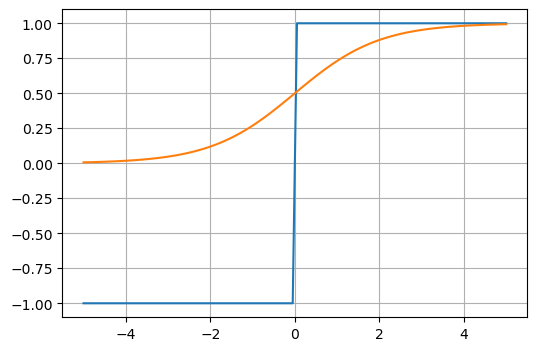

In [67]:
step = lambda x : np.where(x >= 0, 1, -1)
sigmoid = lambda x : 1 / (1 + np.exp(-x))

xs = np.linspace(-5, 5, 100)

plt.figure(figsize=(6, 4))
plt.plot(xs, step(xs), label='step', color='C0')
plt.plot(xs, sigmoid(xs), label='sigmoid', color='C1')
plt.grid()
plt.show()

## 로지스틱 시그모이드

분류를 위한 확률 모델링 과정에서 개발 (1958)

In [92]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.data.shape)
pd.Series(cancer.target).value_counts().rename({0:'악성', 1:'양성'})
display(pd.DataFrame(cancer.data, columns=cancer.feature_names).head())

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [108]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler

scores = {}
model_1 = Perceptron(max_iter=100, eta0=0.1, shuffle=True, random_state=3)
model_1.fit(cancer.data, cancer.target)
scores['Perceptron'] = model_1.score(cancer.data, cancer.target)

scaler = StandardScaler() 
scaled_data = scaler.fit_transform(cancer.data) # 스케일 변환을 위해 정규화
# 데이터를 특성별로 표준화: 평균 0, 표준편차 1
assert np.allclose(scaled_data.mean(axis=0), 0) and np.allclose(scaled_data.std(axis=0), 1)
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(scaled_data, cancer.target)
scores['LogisticRegression'] = model_2.score(scaled_data, cancer.target)

print(pd.Series(scores).round(3))

sample = pd.DataFrame(cancer.data).sample(5)
# display(sample.round(3))

sample_scaled = scaler.transform(sample)
pred_1 = model_1.predict(sample)
pred_2 = model_2.predict(sample_scaled)
예측확률 = model_2.predict_proba(sample_scaled).round(3)
예측확률 = [f'악성:{prob[0]}, 양성:{prob[1]}' for prob in 예측확률]
정답 = cancer.target[sample.index]

pd.DataFrame({'Perceptron': pred_1, 'LogisticRegression': pred_2, '예측확률' : 예측확률, '정답': 정답}).reset_index(drop=True)



Perceptron            0.912
LogisticRegression    0.988
dtype: float64


,Perceptron,LogisticRegression,예측확률,정답
0,1,1,"악성:0.0, 양성:1.0",1
1,0,0,"악성:1.0, 양성:0.0",0
2,0,1,"악성:0.039, 양성:0.961",1
3,0,0,"악성:1.0, 양성:0.0",0
4,1,1,"악성:0.16, 양성:0.84",1


In [132]:
W = model_2.coef_
b = model_2.intercept_
outputs = scaled_data @ W.T + b

p1 = sigmoid(outputs)
p0 = 1 - p1
예측확률 = np.hstack([p0, p1])
assert np.allclose(예측확률, model_2.predict_proba(scaled_data))

pd.DataFrame(예측확률, columns=['악성확률', '양성확률']).sample(5).round(3)

,악성확률,양성확률
366,1.000,0.000
89,0.228,0.772
523,0.078,0.922
83,0.999,0.001
357,0.002,0.998


## 승산률

odd ratio

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
승리확률,0.0,0.01,0.020,0.030,0.040,0.051,0.061,0.071,0.081,0.091,...,0.909,0.919,0.929,0.939,0.949,0.96,0.97,0.98,0.990,1.000
승산률,0.0,0.01,0.021,0.031,0.042,0.053,0.065,0.076,0.088,0.100,...,10.000,11.375,13.143,15.500,18.800,23.75,32.00,48.50,97.999,9999999.005


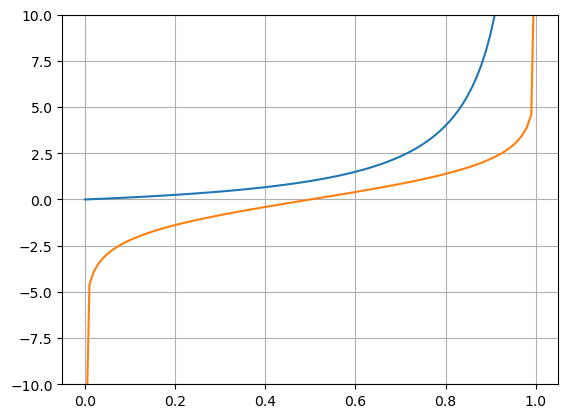

In [ ]:
승산률 = lambda 승리확률 : 승리확률 / (1 - 승리확률)

승리확률 = np.linspace(0, 1.0- 1e-7, 100)

display(pd.DataFrame({
    '승리확률': 승리확률,
    '승산률': 승산률(승리확률)
}).round(3).T)

plt.plot(승리확률, 승산률(승리확률)) # 승산률: odds > 0
plt.plot(승리확률, np.log(승산률(승리확률) + 1e-7)) # -inf < log(승산률) < inf
plt.ylim(-10, 10)
plt.grid()



In [ ]:
Xs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y_xor = np.array([])